In [14]:

import sys
import pickle
sys.path.append("../tools/")
import pandas as pd
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print("There are "+str(len(data_dict))+ " people in the dataset.")

There are 146 people in the dataset.


In [15]:
tableOfValues = pd.DataFrame.from_dict(data_dict,orient='index')
tableOfValues

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


# Now we know what features are there in the dataset, you can also see there are a lot of NaN values.

So inorder to use the features efficiently we need to get rid of the NaN values, This helps us achieving correct results. 

In [16]:
 
### Task 1: Select what features you'll use.
#print(data_dict.items()[0]) #SHOWS all the features that are in the data that was loaded.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary','to_messages','deferral_payments','total_payments','exercised_stock_options','bonus','restricted_stock',
                'shared_receipt_with_poi','restricted_stock_deferred','total_stock_value','expenses','loan_advances','from_messages','other','from_this_person_to_poi',
                'director_fees','deferred_income','long_term_incentive','email_address','from_poi_to_this_person'] 

print("There are "+str(len(features_list))+" features in the dataset") #shows the number of features that we will start off with.

There are 21 features in the dataset


Now we take care of the "NaN" values by replacing them with numpy.nan .


# Why use sns.PairGrid()?


Pairgrid allows plotting pairwise relationships within a dataset. So from the scatterplots  

In [19]:
import seaborn as sns
import numpy
tableOfValues.replace(to_replace='NaN', value=numpy.nan, inplace=True)


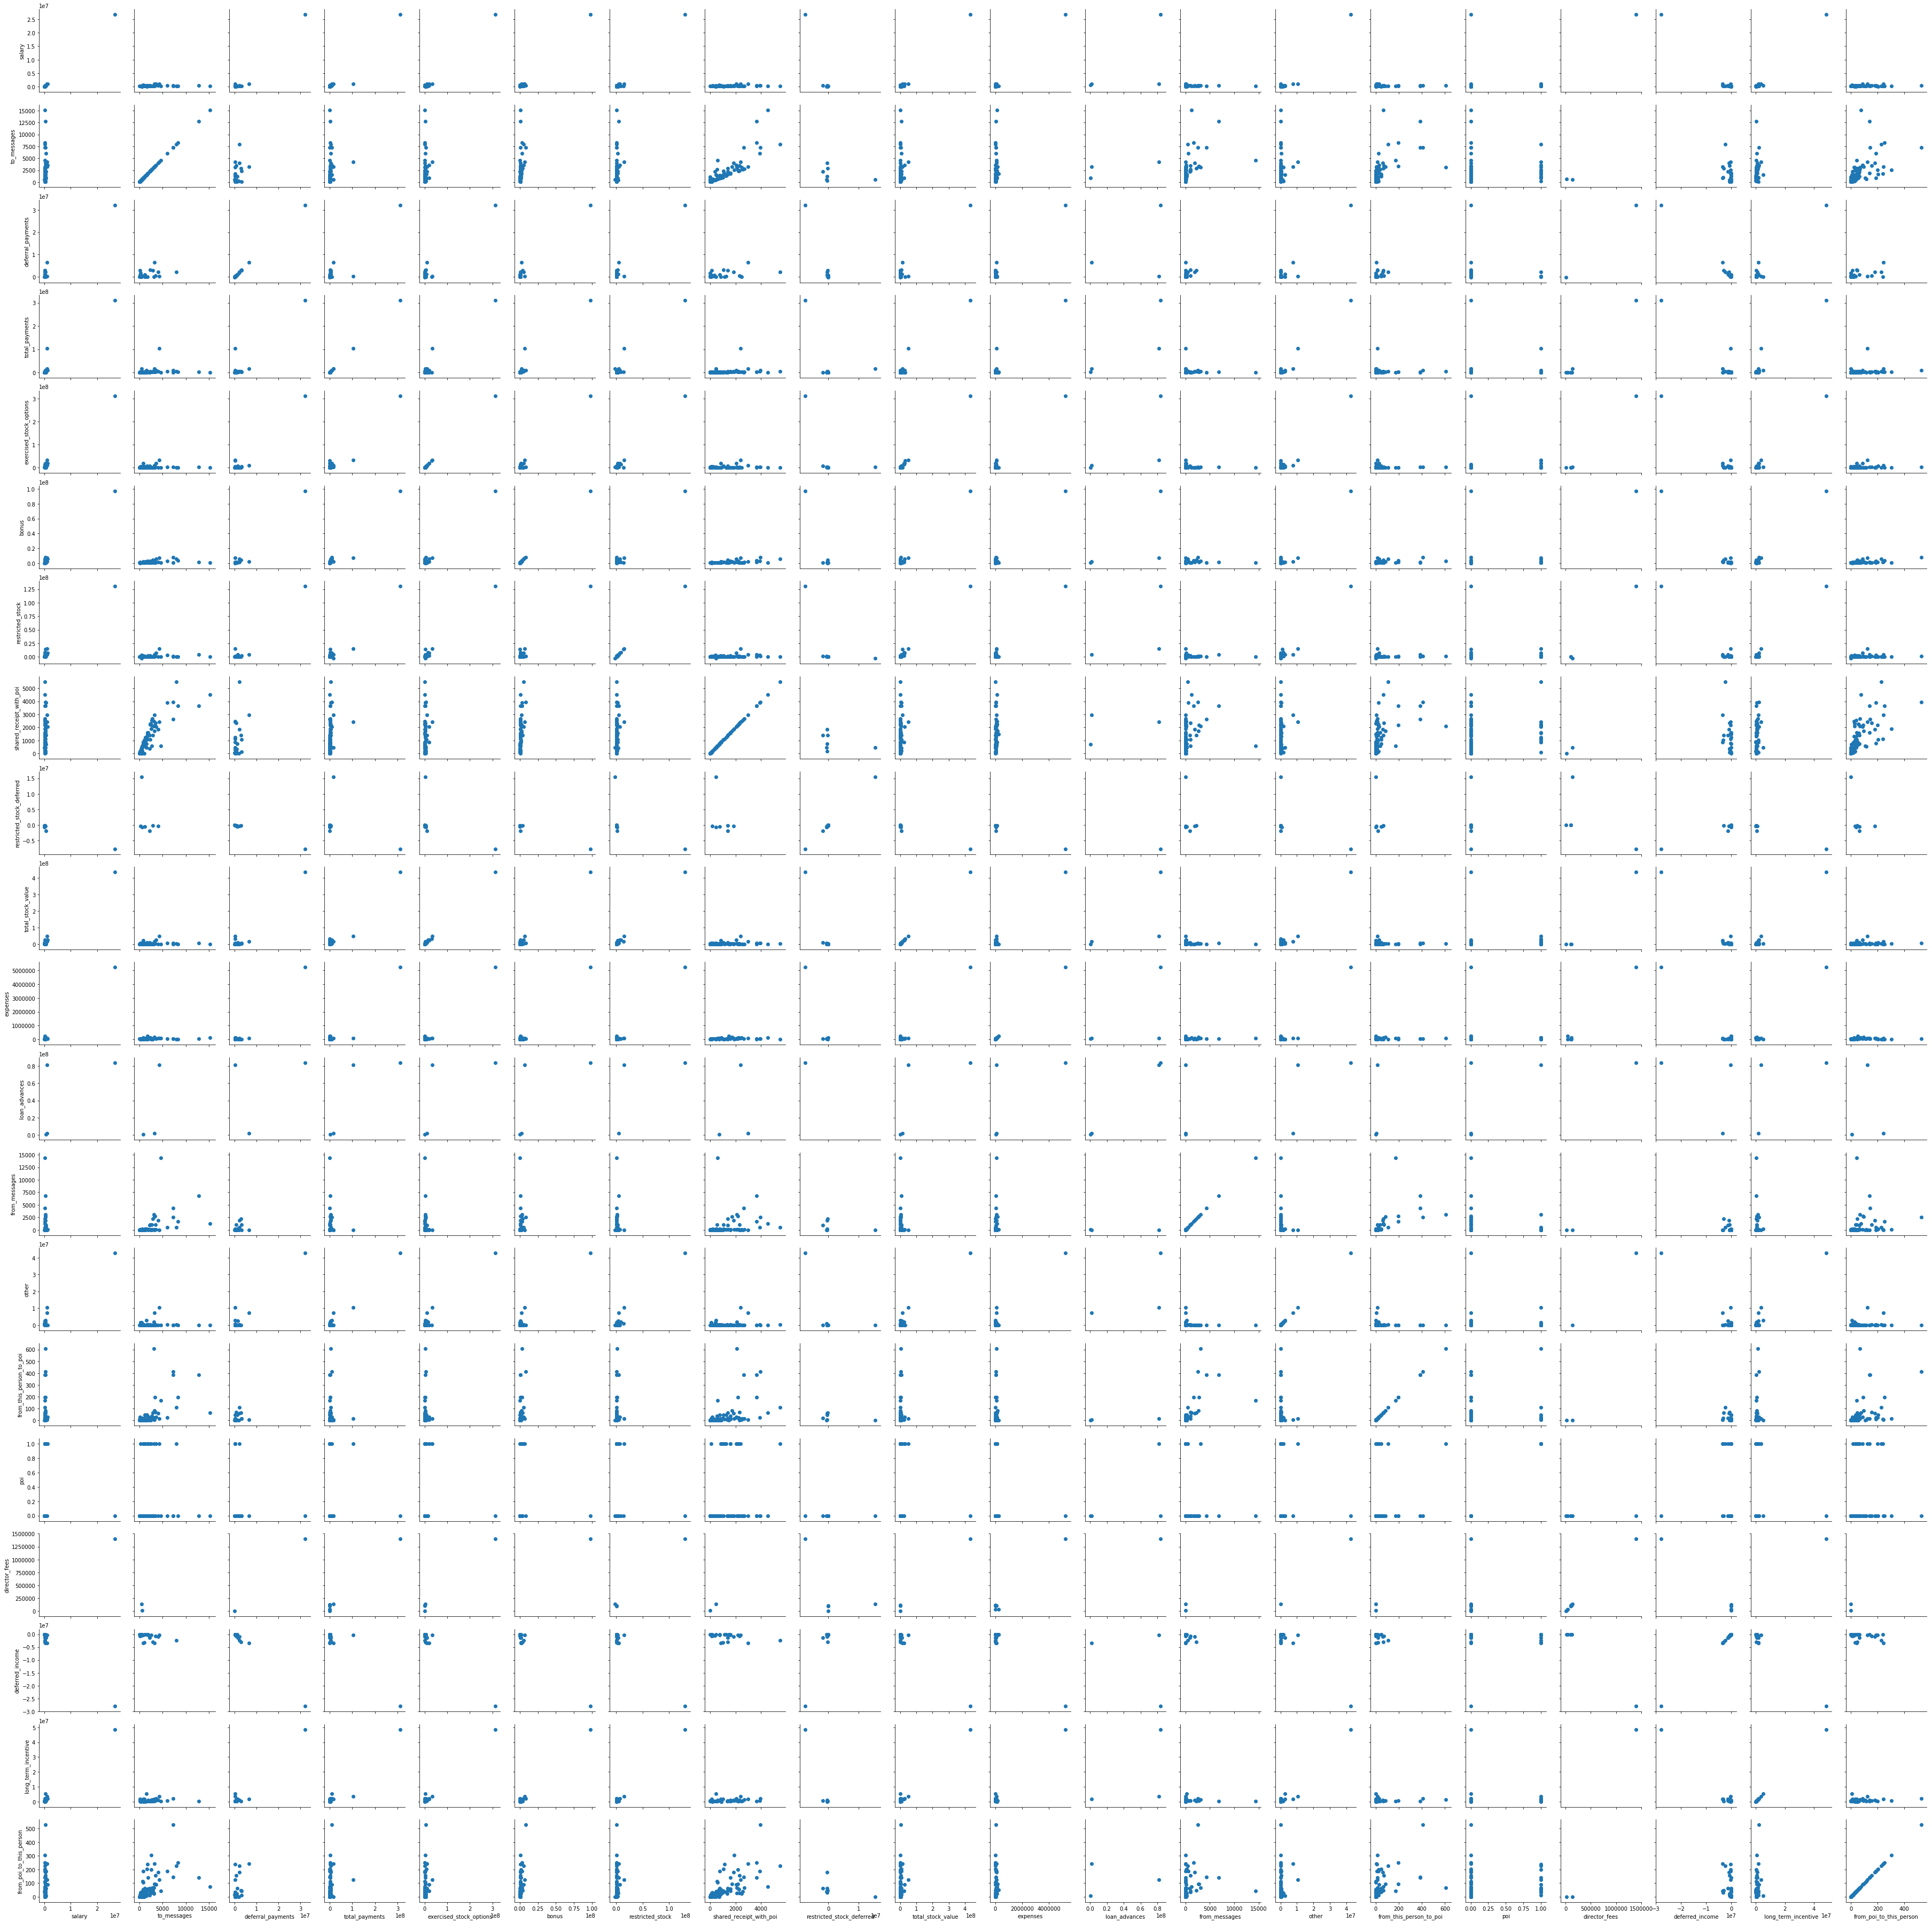

In [5]:

import matplotlib.pyplot as plt
%matplotlib inline

g=sns.PairGrid(tableOfValues)
g.map(plt.scatter)


In [20]:
#Creating a new features list from our findings above.
features_list = ['poi','salary','bonus','to_messages','deferral_payments','total_payments','exercised_stock_options',
                'restricted_stock','shared_receipt_with_poi','restricted_stock_deferred','total_stock_value','expenses',
                'loan_advances','from_messages','other','from_this_person_to_poi','director_fees','deferred_income','long_term_incentive'
                ,'from_poi_to_this_person']


### Task 2: Remove outliers
import matplotlib.pyplot as plt

newDictValues = data_dict
dataVal = featureFormat(newDictValues,features_list)

final_outliersList=[]
for k in range(len(features_list)):
    for j in range(len(features_list)):
        values=[]
        xlabel = features_list[k]
        ylabel=features_list[j]
        
        ###
        if xlabel!=ylabel:
            for points in dataVal:
                values.append((points[k],points[j]))
        
            outlier =sorted(values,key=lambda x:x[0],reverse=True)[0] #gets the topmost outliers in the data
        
            for key in newDictValues:
                if outlier[1]== newDictValues[key][features_list[j]]:
                    final_outliersList.append((key,newDictValues[key][features_list[j]]))




Now we remove the outliers that are present in the list such that are models can perform better/accurately.

In [21]:
print("There is a column called TOTAL and that need to be removed/eliminated")

newDictValues.pop("TOTAL")

There is a column called TOTAL and that need to be removed/eliminated


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [22]:
tableOfValues = pd.DataFrame.from_dict(newDictValues,orient='index')
tableOfValues

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


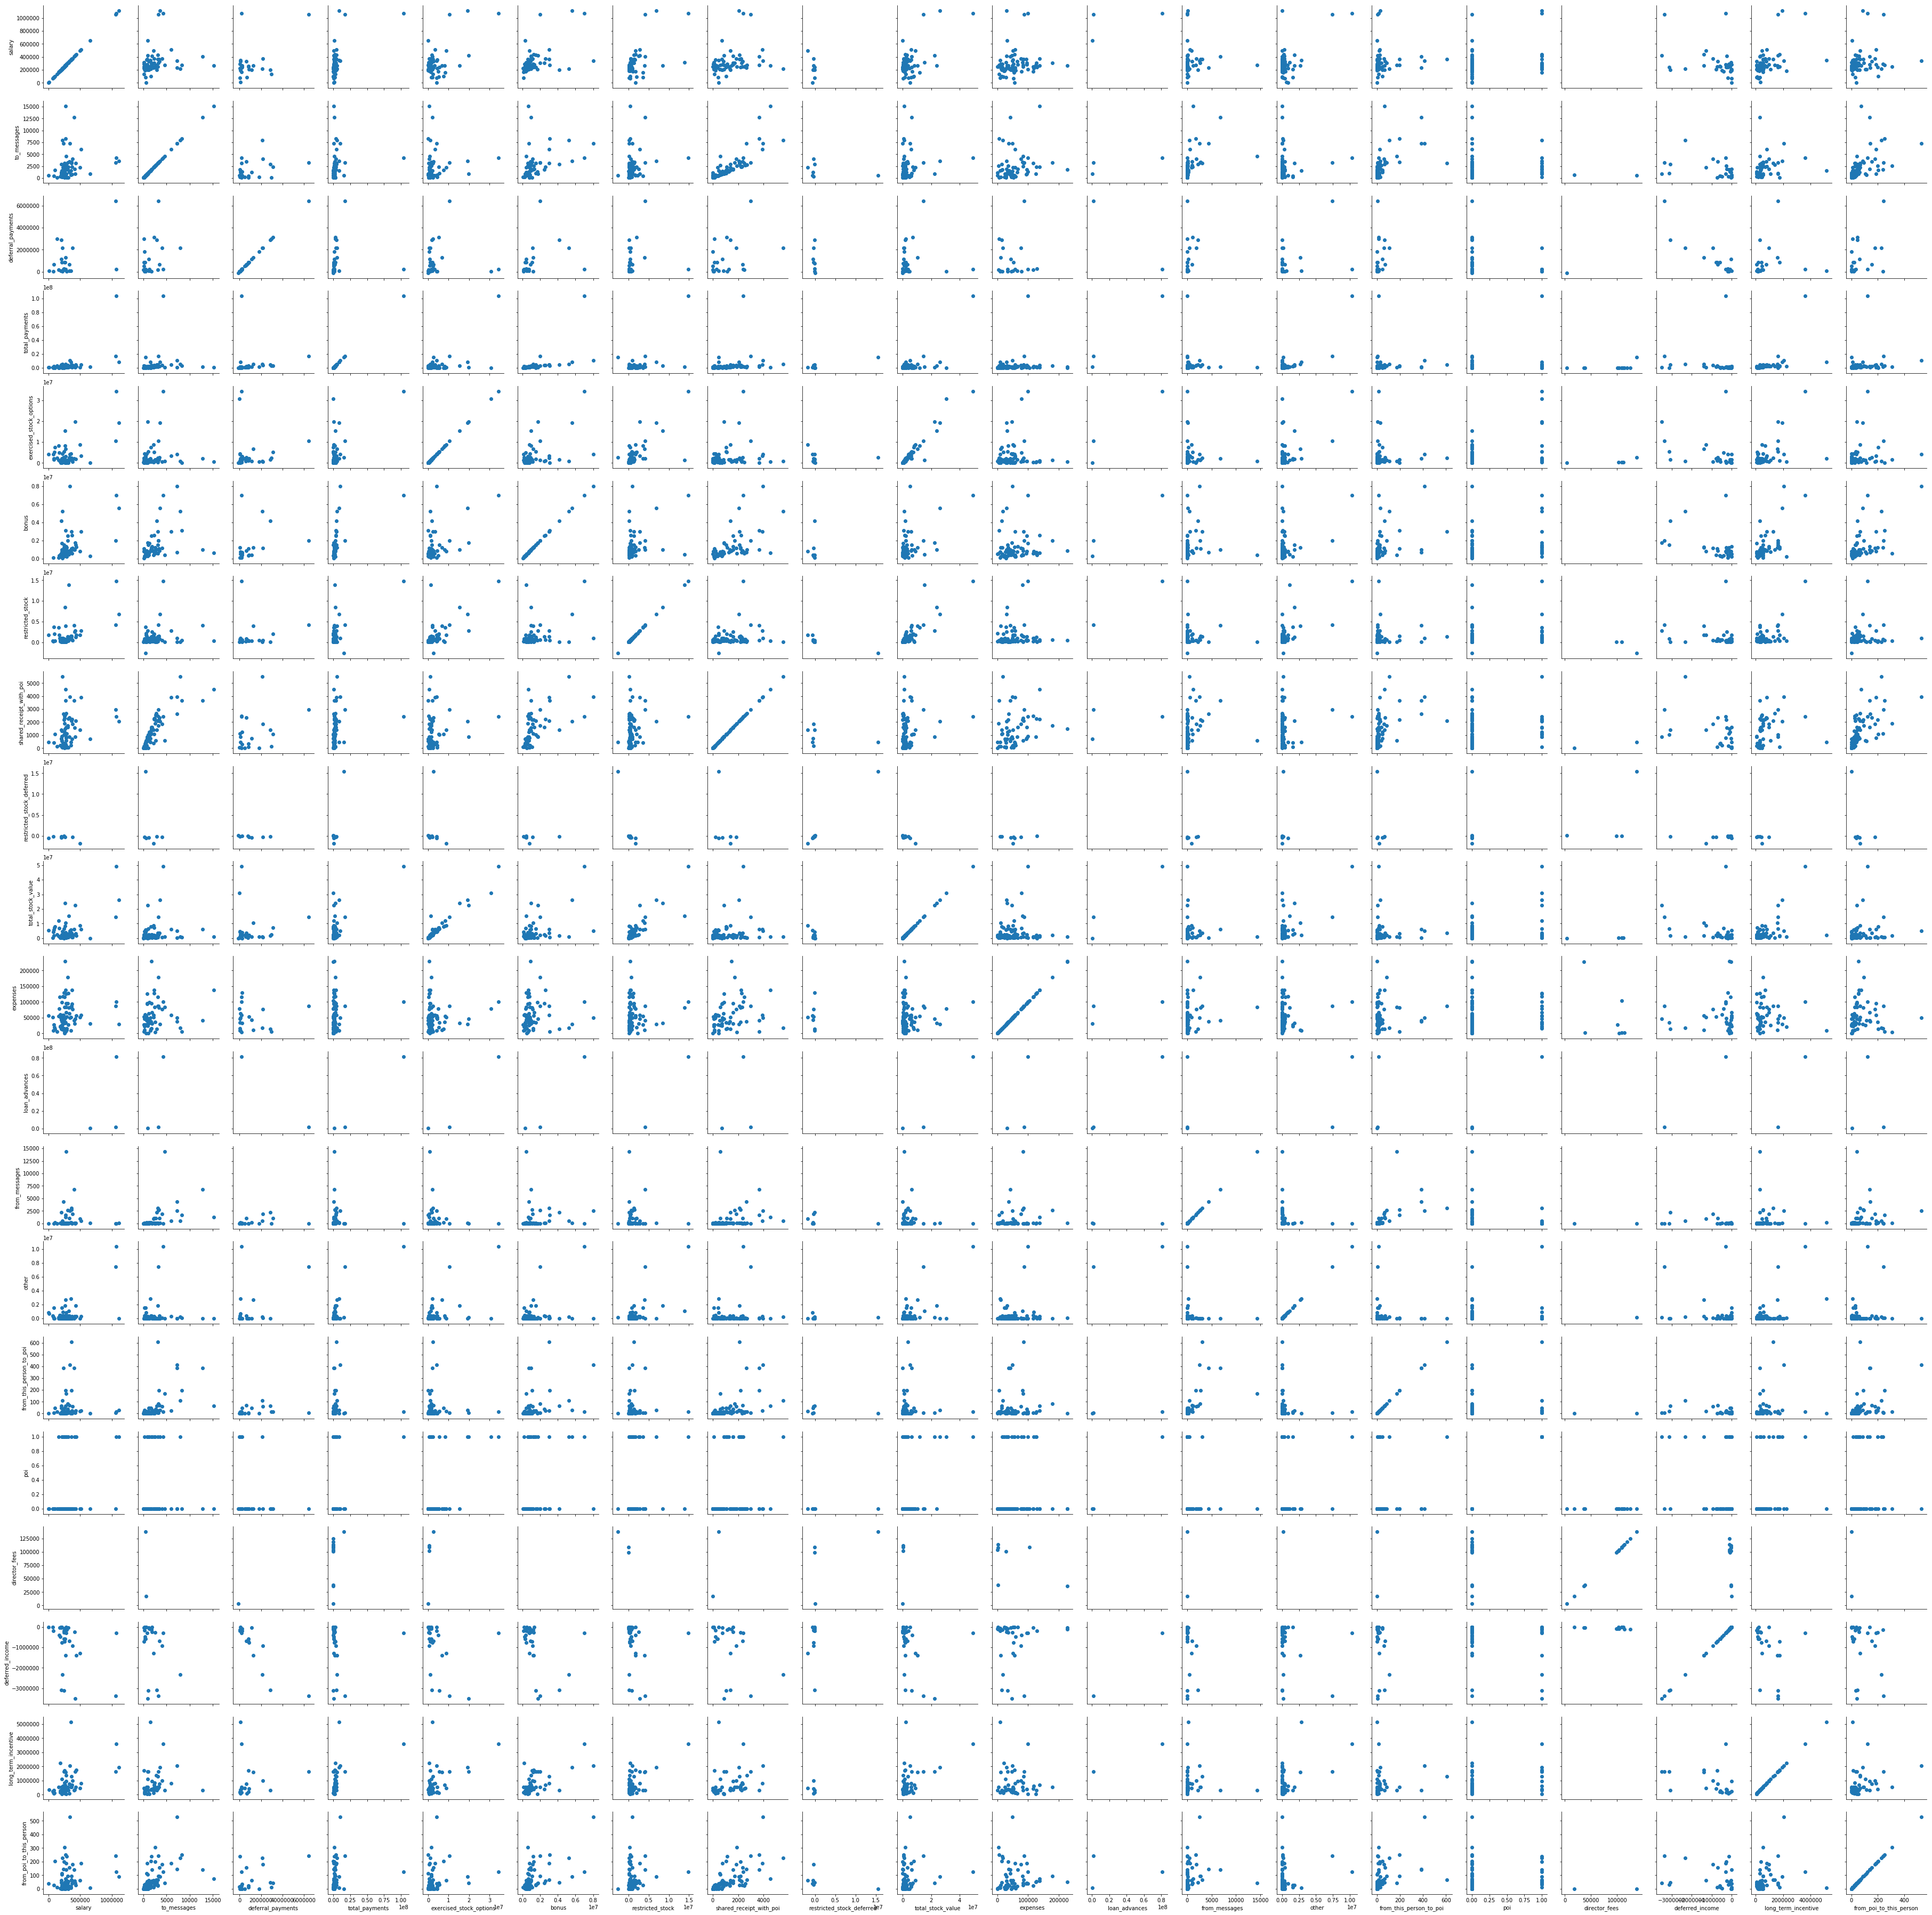

In [23]:
tableOfValues.replace(to_replace='NaN', value=numpy.nan, inplace=True)
g=sns.PairGrid(tableOfValues)
g.map(plt.scatter)

# Why use the xlsxwriter library?

I convert the data in the DataFrame in to an excel sheet where i use the excel sheet imported into GRETL http://gretl.sourceforge.net/ where i construct a model with features that can be used/ important.

In [10]:
tableOfValues.replace(to_replace=numpy.nan, value=0, inplace=True)
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

tableOfValues.to_excel(writer,sheet_name='Sheet1')
writer.save()

![title](gretlImage.png )

If you dont have GRETL, the below diagram shows the correlation matrix that shows the probability of how the features are related to each other. https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

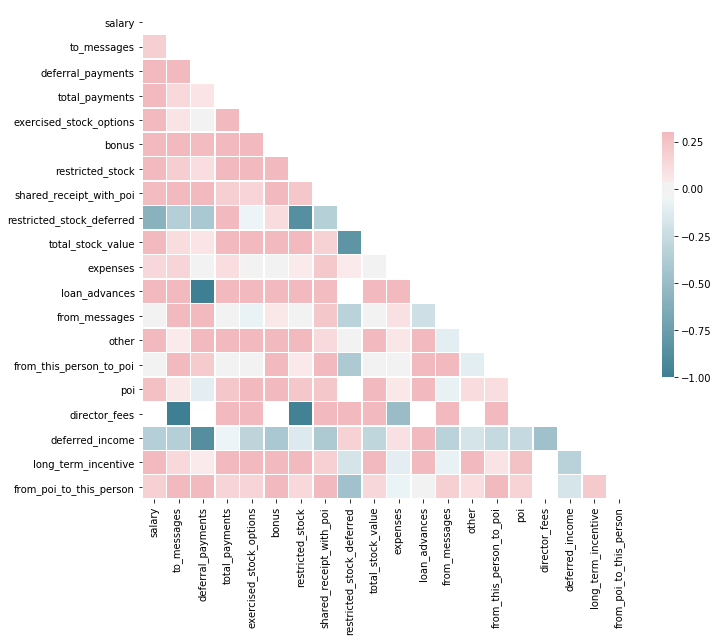

In [24]:
import numpy as np
mask = np.zeros_like(tableOfValues.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(tableOfValues.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.

features_list = ['poi','salary','bonus','total_payments','total_stock_value','expenses','loan_advances',
                 'from_messages','other','from_this_person_to_poi','long_term_incentive',
                 'from_poi_to_this_person']

            
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)




In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier




clf = Pipeline([('AdaBoost',AdaBoostClassifier())])



from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


clf.fit(features_train,labels_train)
pred=clf.predict(features_test)




In [18]:
dump_classifier_and_data(clf, my_dataset, features_list)